In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'],index_col='date')

In [70]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [71]:
top_cutoff = df['value'].quantile(0.975)
bottom_cutoff = df['value'].quantile(0.025)

# Filter the DataFrame to exclude days in the top and bottom 2.5%
df_cleaned = df[(df['value'] >= bottom_cutoff) & (df['value'] <= top_cutoff)]

# Display the cleaned DataFrame
df_cleaned

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


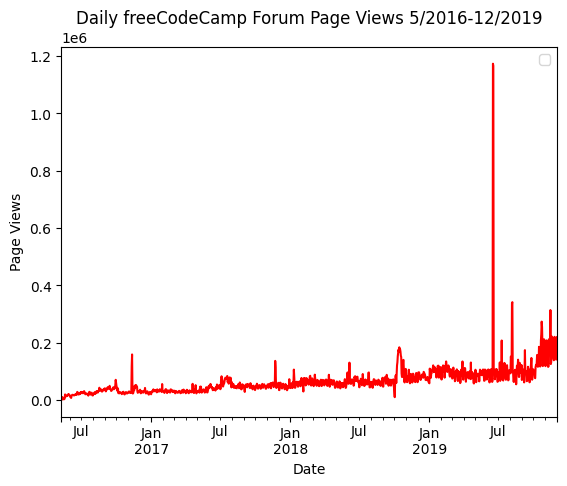

In [72]:
df.plot(kind='line', y='value', color='r')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.legend("")
# Show the plot
plt.show()

In [73]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [74]:
df.reset_index(inplace=True)

In [79]:
df['date'] = pd.to_datetime(df['date'])

    # Extract year and month from the 'date' column
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.strftime('%B')  # Full month name
    
    # Group by year and month, calculate the average page views
df_grouped = df.groupby(['Year', 'Month'], as_index=False).mean()

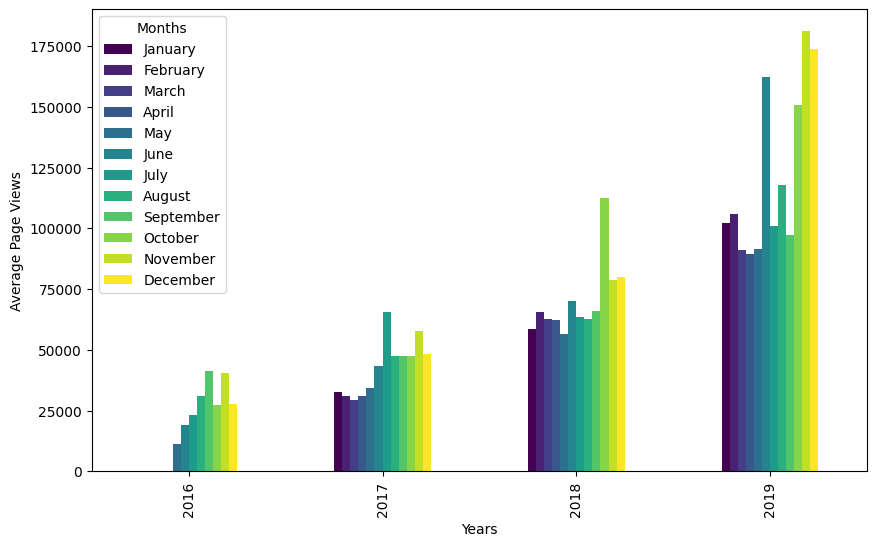

In [86]:
df_pivot = df_grouped.pivot(index='Year', columns='Month', values='value')

    # Reorder the months for better visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar = df_pivot[month_order]

    # Plot the bar chart
ax = df_bar.plot(kind='bar', figsize=(10, 6), colormap='viridis')

    
    # Add labels and title
plt.xlabel('Years')
plt.ylabel('Average Page Views')

    # Show legend with the title 'Months'
plt.legend(title='Months', loc='upper left')

    # Show the plot
plt.show()

In [80]:
df_pivot.head()

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333


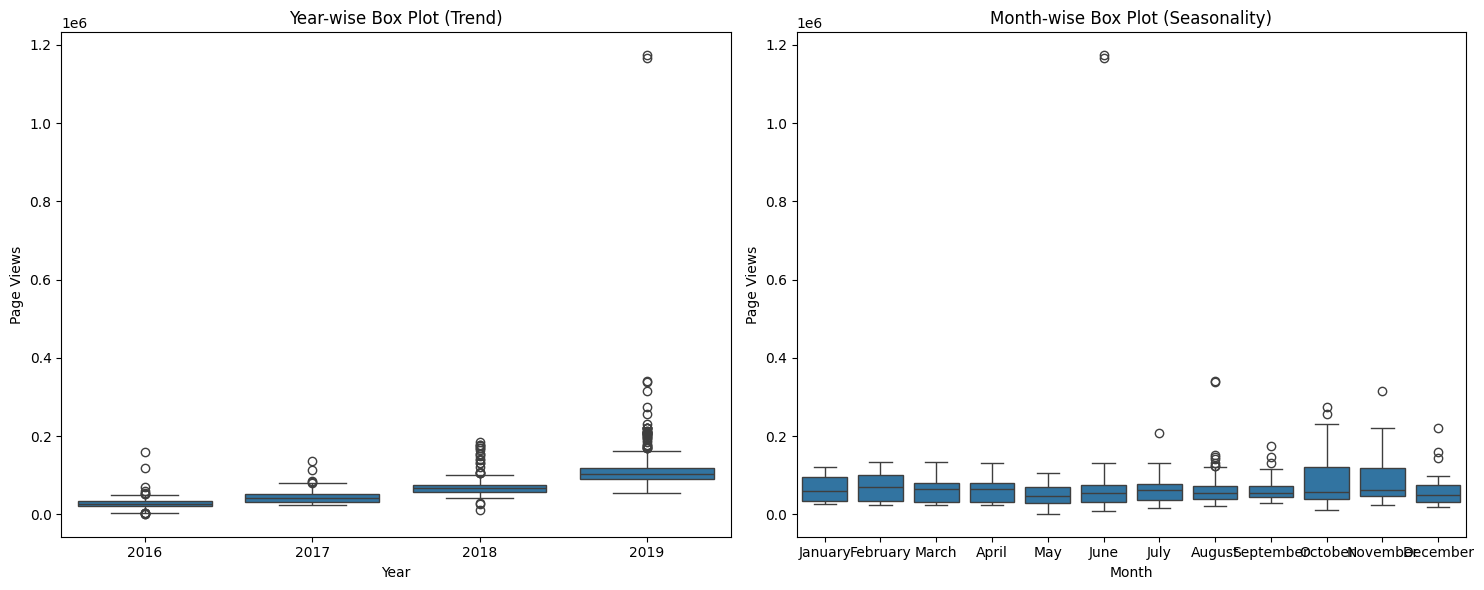

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(x='Year', y='value', data=df, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

    # Second subplot: Month-wise Box Plot (Seasonality)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.boxplot(x='Month', y='value', data=df, order=month_order, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

    # Adjust layout to prevent overlapping
plt.tight_layout()

    # Show the plot
plt.show()
